In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Explanation of Columns in the dataset
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST   elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Exploratory Data Analysis

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset contains only non-null values, so we don't have to deal with missing values

In [8]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


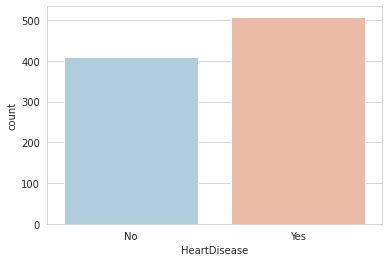

In [12]:
#checking if the dataset is balanced or not
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

Seems like a balanced dataset

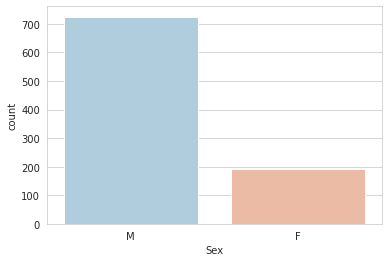

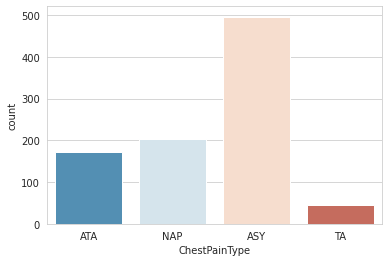

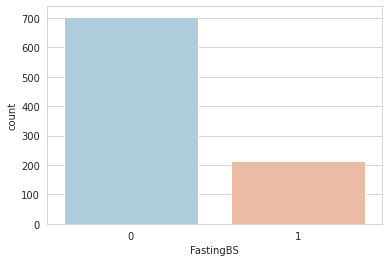

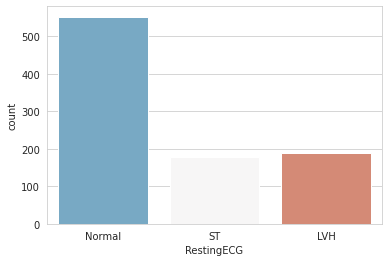

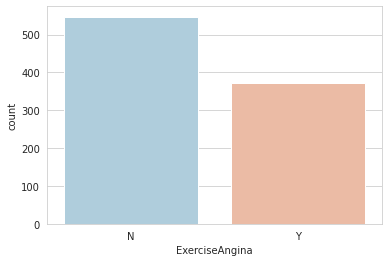

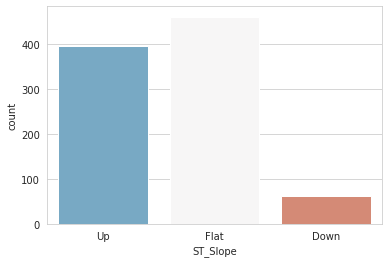

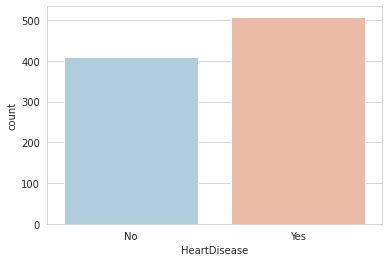

In [13]:
for column in categorical_columns:
    sns.set_style('whitegrid')
    sns.countplot(x=column,data=df,palette='RdBu_r')
    plt.show()

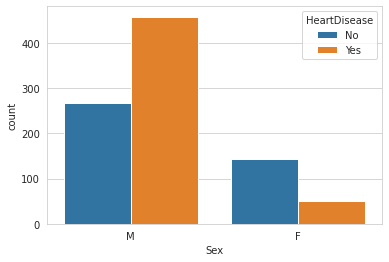

In [14]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)

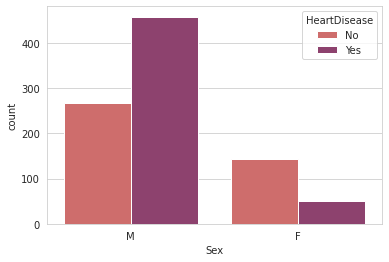

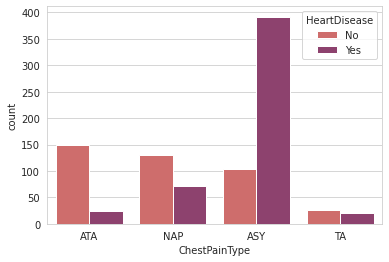

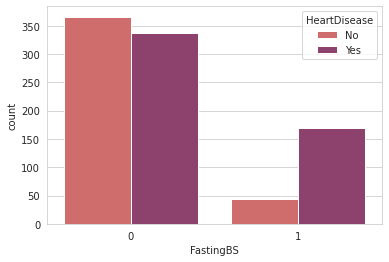

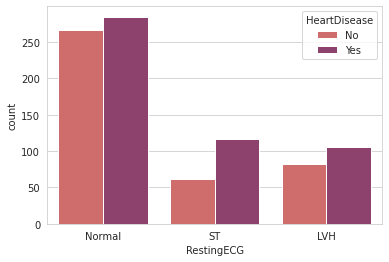

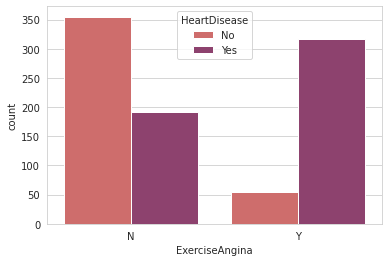

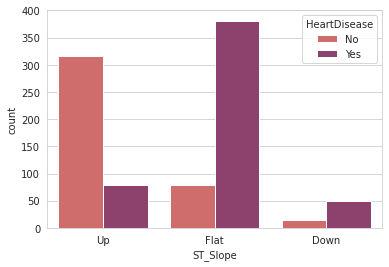

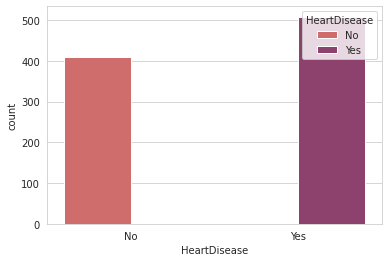

In [15]:
for column in categorical_columns:
    sns.countplot(x=column, hue='HeartDisease', data=df, palette="flare")
    plt.show()

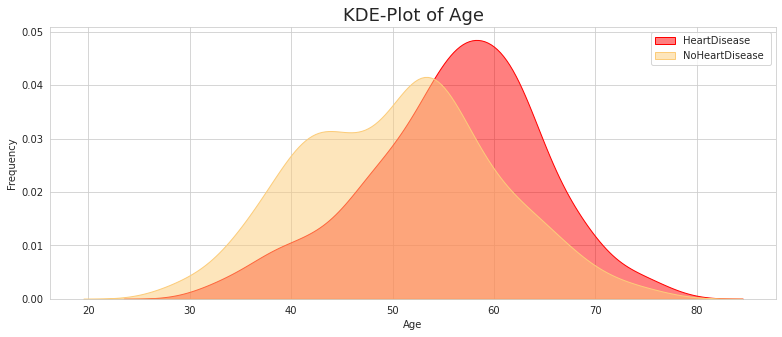

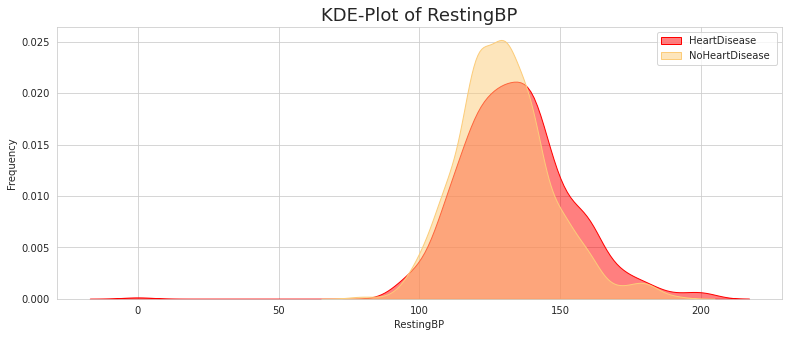

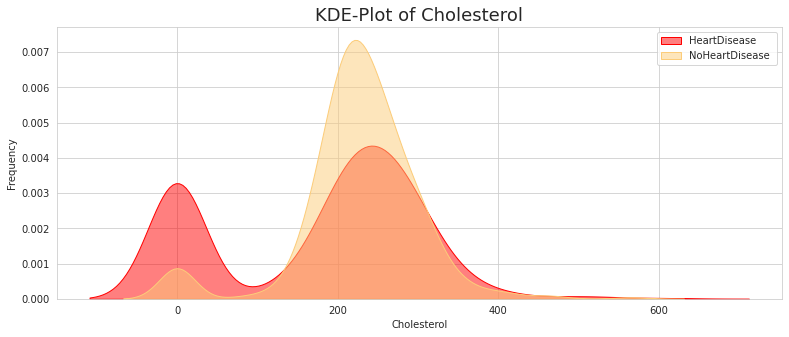

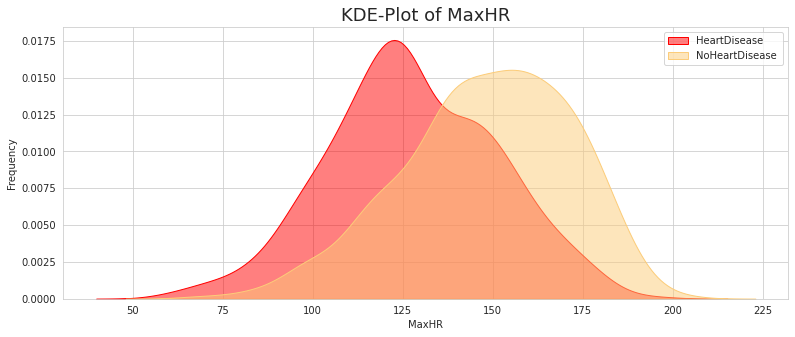

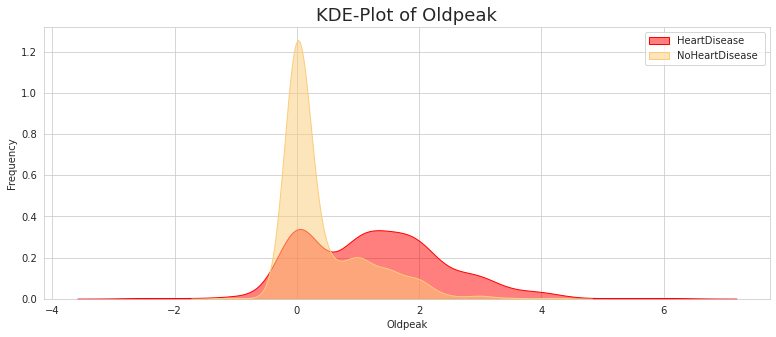

In [16]:
for column in numerical_columns:
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df['HeartDisease']=='Yes'][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)  
    sns.kdeplot(df[df['HeartDisease']=='No'][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)  
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()


📍 Age :
- Average Age is 53.
- Maximum Age is 77
- Minimum Age is 28
- Most of heart disease Patients have age between 55 and 65

📍 OldPeak :
- Old peak = ST depression induced by exercise relative to rest
- Average OldPeak is 0.88
- Maximum OldPeak is 6.2
- Minimum OldPeak is -2.6
- Most patients with 0 oldpeak, don't have Heart disease

📍 Cholesterol :
- For person aged 20 years and older, the Cholesterol level should be between 125 and 200 mg/dL.
- Average Cholesterol is 198.7 mg/dl
- Maximum is 603 >>> 200 mg/dl
- Minimum Cholesterol is 0 => Cholesterol should be != 0

📍 MaxHR :
- There are a number of formulas out there for calculating max heart rate. The easiest and most commonly used one is to simply subtract your age from 220. So if you're 40 years old, your max heart rate would be 180 bpm. Source
- Average MaxHR is 136. Age average is 53 so based of this formula the MaxHR average will be around 167
- Maximum is 202 >> 162
- Minimum MaxHR is 60 => So 220 - 60 = Age = 160 years old ! hmm 🤔
- Based on the formula it does not make any logic (the oldest man in the world is 119 years old 😁 )
- MaxHR : Calculate your resting heart rate by counting how many times your heart beats per minute when you are at rest, such as first thing in the morning. It's usually somewhere between 60 and 100 beats per minute for the average adult.
- So 60 can be a result of calculation with another formula
- Most of tested patients with heart disease have around 120 maxHR

📍 RestingBP :
- A normal blood pressure level is around 120/80 mmHg..
- Minimum is 0 => Must be an outlier data
- Maximum blood pressure is 200
- Most tested Patients have RestingBP between 120 and 150

## Feature Engineering

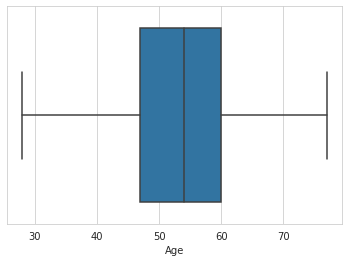

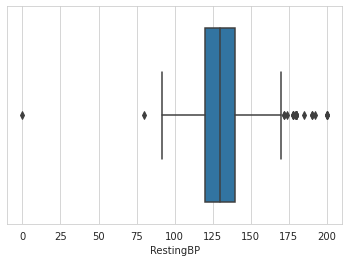

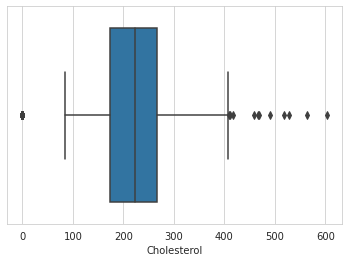

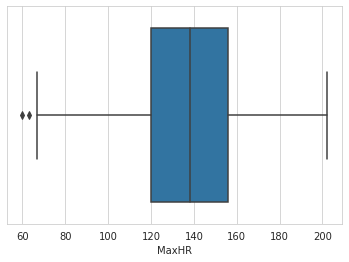

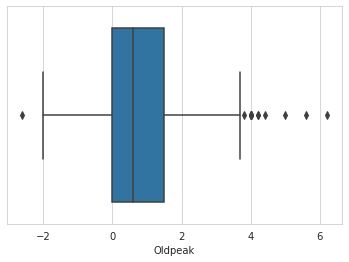

In [17]:
#Handling Outliers
for column in numerical_columns: 
    ax = sns.boxplot(x=df[column])
    plt.show()

In [18]:
df1 = df[df.Cholesterol != 0]
df1 = df1[df1.RestingBP > 70]

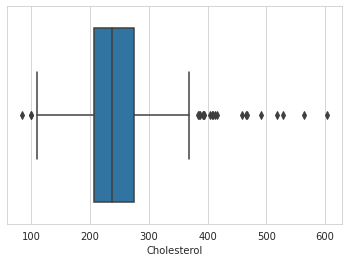

In [19]:
 ax = sns.boxplot(x=df1["Cholesterol"])

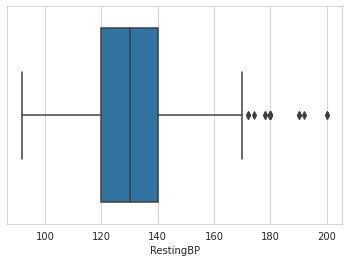

In [20]:
 ax = sns.boxplot(x=df1["RestingBP"])

### One Hot Encoding & Scaling

In [ ]:
#final_df = pd.get_dummies(df1, columns=categorical_columns[:-1])

In [33]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             746 non-null    int64   
 1   Sex             746 non-null    object  
 2   ChestPainType   746 non-null    object  
 3   RestingBP       746 non-null    int64   
 4   Cholesterol     746 non-null    int64   
 5   FastingBS       746 non-null    category
 6   RestingECG      746 non-null    object  
 7   MaxHR           746 non-null    int64   
 8   ExerciseAngina  746 non-null    object  
 9   Oldpeak         746 non-null    float64 
 10  ST_Slope        746 non-null    object  
 11  HeartDisease    746 non-null    category
dtypes: category(2), float64(1), int64(4), object(5)
memory usage: 65.8+ KB


In [36]:
for col in categorical_columns:
    df1[col] = df1[col].astype('category')

In [37]:
df1['Sex'] = df1['Sex'].cat.rename_categories({'M':1 , 'F': 0})

In [39]:
df1['ChestPainType'] = df1['ChestPainType'].cat.rename_categories({'TA':0 , 'ATA': 1, 'NAP': 2, 'ASY': 3})

In [40]:
df1['RestingECG'] = df1['RestingECG'].cat.rename_categories({'Normal':0 , 'ST': 1, 'LVH': 2})

In [41]:
df1['ExerciseAngina'] = df1['ExerciseAngina'].cat.rename_categories({'Y':1 , 'N': 0})

In [43]:
df1['ST_Slope'] = df1['ST_Slope'].cat.rename_categories({'Up':0 , 'Flat': 1, 'Down': 2})

In [44]:
df1['HeartDisease'] = df1['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})

In [45]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


In [46]:
X = df1.drop(columns=["HeartDisease"], axis=1)
y = df1['HeartDisease']

In [47]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
X_scaled

array([[-1.35607325,  0.56806253, -1.21865408, ..., -0.79074163,
        -0.84094155, -0.9868448 ],
       [-0.40865641, -1.76036959, -0.17128548, ..., -0.79074163,
         0.0917709 ,  0.6863057 ],
       [-1.67187886,  0.56806253, -1.21865408, ..., -0.79074163,
        -0.84094155, -0.9868448 ],
       ...,
       [ 0.43349189,  0.56806253,  0.87608311, ...,  1.26463557,
         0.27831339,  0.6863057 ],
       [ 0.43349189, -1.76036959, -1.21865408, ..., -0.79074163,
        -0.84094155,  0.6863057 ],
       [-1.56661032,  0.56806253, -0.17128548, ..., -0.79074163,
        -0.84094155, -0.9868448 ]])

In [48]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [49]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: category
Categories (2, int64): [0, 1]

# Modeling
Let's build some simple models provided by Scikit learn library :
- Logistic Regression
- K Nearest Neighbors
- Support Vectors
- Decision Tree
- Random Forest
- Naive Bayes

In [50]:
#Splitting data
from sklearn.model_selection import train_test_split
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [52]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [53]:
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

In [54]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.882353,0.866667,0.886364,0.876404
Support Vector Machines,0.871658,0.844444,0.883721,0.863636
K-Nearest Neighbor,0.871658,0.855556,0.875000,0.865169
Logistic Regression,0.866310,0.833333,0.882353,0.857143
Naive Bayes,0.860963,0.822222,0.880952,0.850575
Decision Trees,0.818182,0.777778,0.833333,0.804598


We can see that our Random Forest model tops the other models in almost all the metrics , except precision. So Random Forest is our base model

## Model Optimisation

optimising our RandomForest model by tuning the hyper parameters available from the scikit-learn library. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

In [55]:
# Create a default model
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}
# Create a base model
rf_random = RandomForestClassifier(random_state=0)

# Initiate the grid search model
rf_search = RandomizedSearchCV(estimator=rf_random, param_distributions=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1)
# Fit the grid search to the data
rf_fit = rf_search.fit(X_train, y_train)
best_parameters = rf_fit.best_params_

In [73]:
# Show the best params of grid search
best_parameters

{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': 2,
 'max_depth': 80}

#### Train and Test Predictions

In [77]:
best_classifier = RandomForestClassifier(n_estimators=750, max_depth=80, min_samples_leaf=4, min_samples_split=8,max_features=3)
best_classifier.fit(X_train, y_train)
predictions = best_classifier.predict(X_test)
train_predictions = best_classifier.predict(X_train)

**Train Accuracy**

In [78]:
print(accuracy_score(train_predictions, y_train))
print(recall_score(train_predictions, y_train))
print(precision_score(train_predictions, y_train))
print(f1_score(train_predictions, y_train))

0.9177101967799642
0.9104477611940298
0.9172932330827067
0.9138576779026217


In [79]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       293
           1       0.91      0.92      0.91       266

    accuracy                           0.92       559
   macro avg       0.92      0.92      0.92       559
weighted avg       0.92      0.92      0.92       559



**Test Accuracy**

In [80]:
print(accuracy_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(precision_score(predictions, y_test))
print(f1_score(predictions, y_test))

0.8877005347593583
0.8791208791208791
0.8888888888888888
0.883977900552486


In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        97
           1       0.88      0.89      0.88        90

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



We see that the model is right fit. Train accuracy is almost equal to the Test accuracy.

In [82]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[86 11]
 [10 80]]


In [83]:
best_features = best_classifier.feature_importances_

In [84]:
best_features = np.sort(best_features)

<BarContainer object of 11 artists>

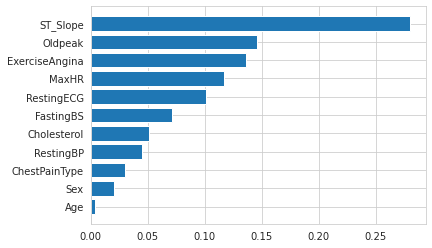

In [85]:
plt.barh(X.columns, best_features)

In [86]:
# Creating a pickle file for the classifier
import pickle
filename = 'random_forest_classifier.pkl'
pickle.dump(best_classifier, open(filename, 'wb'))